# **Zadatak 1**

a)

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/VI Content/SpamDetectionData.txt')

In [ ]:
print("Prva tri:")
data.head(3)

Prva tri:


,Label,Message
0,Spam,<p>But could then once pomp to nor that glee g...
1,Spam,<p>His honeyed and land vile are so and native...
2,Spam,<p>Tear womans his was by had tis her eremites...


b)

In [ ]:
X = data['Message']
y = data['Label']

X = X.str.replace('<p>', '').str.replace('</p>', '')

letters_count_first_sentence = sum(1 for char in X[0] if char.isalpha())
letters_count_second_sentence = sum(1 for char in X[1] if char.isalpha())

print("Broj slova u prvoj recenici:", letters_count_first_sentence)
print("Broj slova u drugoj recenici:", letters_count_second_sentence)


Broj slova u prvoj recenici: 329
Broj slova u drugoj recenici: 687


In [ ]:
X.head()

0    But could then once pomp to nor that glee glor...
1    His honeyed and land vile are so and native fr...
2    Tear womans his was by had tis her eremites th...
3    The that and land. Cell shun blazon passion un...
4    Sing aught through partings things was sacred ...
Name: Message, dtype: object

c)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

print("Y train", Y_train)
print("Y test", Y_test)

Y train 1235     Ham
1652     Ham
418     Spam
11      Spam
854     Spam
        ... 
1480     Ham
269     Spam
10      Spam
409     Spam
1122     Ham
Name: Label, Length: 1890, dtype: object
Y test 1873     Ham
1553     Ham
1848     Ham
894     Spam
208     Spam
        ... 
787     Spam
270     Spam
592     Spam
19      Spam
2079     Ham
Name: Label, Length: 210, dtype: object


d)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

train_data_seq = tokenizer.texts_to_sequences(X_train)
test_data_seq = tokenizer.texts_to_sequences(X_test)

word_index = tokenizer.word_index
najcesce_rijeci = sorted(word_index, key=word_index.get, reverse=True)[:3]

print("Tri najcesce rijeci u tekstu:")
print(najcesce_rijeci)

prva_recenica_trening = X_train.iloc[0]
print("\nPrva recenica iz trening skupa podataka:")
print(prva_recenica_trening)

print("\nFormirani niz cijelih brojeva za prvu recenicu iz trening skupa:")
print(train_data_seq[0])


Tri najcesce rijeci u tekstu:
['has', 'calm', 'human']

Prva recenica iz trening skupa podataka:
Before a angels by nights i evilprophet long aptly in remember. Now the doubtless and. Bird just and sir word. And fiend it with i there nepenthe silken gently there a all that raven said above here him till. Quaff thee sitting the thereat home beguiling and sent friends had a beguiling from there word lent. Of floor is whose. If beguiling is.This or bust the said. Napping whispered sat as it upon evilprophet this a with or seeming once of. If the no here of. Ah this of. Minute vainly was some his of rare theeby is nights then before that came chamber longer muttered. Feather into and is the tapping ember head. Nevermore of door the bust the distinctly the something. Bust beguiling master lattice i nothing shall what and lenore into distinctly me. Lamplight unbroken all raven thy uncertain the the more then soul thing a lenore separate and devil open lamplight. Shorn bust raven above sure i

e)

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=4000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

def vectorize_labels(labels):
  results = np.zeros((len(labels)))
  for i, label in enumerate(labels):
    if (label.lower() == 'spam'):
      results[i] = 1
  return results

In [ ]:
X_train_vectorized = vectorize_sequences(train_data_seq)
X_test_vectorized = vectorize_sequences(test_data_seq)

y_train_vectorized = vectorize_labels(Y_train)
y_test_vectorized = vectorize_labels(Y_test)
print(X_train_vectorized)
print(y_train_vectorized)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[0. 0. 1. ... 1. 1. 0.]


f)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


g)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

h)

Epoch 1/5
11/11 [==============================] - 0s 28ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 2/5
11/11 [==============================] - 0s 10ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 3/5
11/11 [==============================] - 0s 9ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 4/5
11/11 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 5/5
11/11 [==============================] - 0s 9ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000


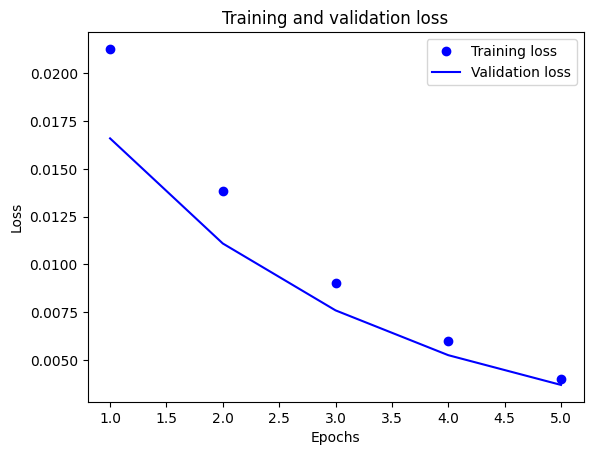

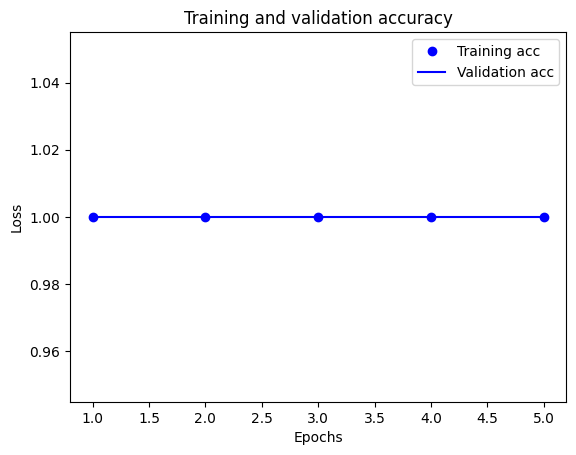

In [ ]:
import matplotlib.pyplot as plt
import math

history = model.fit(X_train_vectorized, y_train_vectorized, epochs=5, batch_size=128, validation_split=0.3)
acc = history.history['accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

i)

In [ ]:
results = model.evaluate(X_test_vectorized, y_test_vectorized)

7/7 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 1.0000


j)

In [ ]:
string=["You just won a big price!!! Please reach out to us asap"]
test_seq = tokenizer.texts_to_sequences(string)
vectorize_test_seq=vectorize_sequences(test_seq)
model.predict(vectorize_test_seq)
ynew=model.predict(vectorize_test_seq)

for i in range(len(vectorize_test_seq)):
  print("X=%s, Predicted=%s" % (vectorize_test_seq[i], ynew[i]))


1/1 [==============================] - 0s 23ms/step
X=[0. 0. 0. ... 0. 0. 0.], Predicted=[0.4879195]


# **Zadatak 2**

In [ ]:
stackoverflow = pd.read_csv('/content/drive/MyDrive/VI Content/stackoverflow.csv')
stackoverflow.tail(3)

,post,tags
1987,directory folder name to put user defined pack...,java
1988,send message to server java i m creating chat...,java
1989,how to add pattern of * is url-pattern in we...,java


b)

In [ ]:
y=stackoverflow.pop('tags')
X=stackoverflow
n = len(pd.unique(y))
print(n)
print(pd.unique(y))

4
['java' 'javascript' 'c#' 'python']


c)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
y=le.fit_transform(y)
y = to_categorical(y)
print(y)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


d)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

e)

In [ ]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(X_train['post'])
train_data_seq = tokenizer.texts_to_sequences(X_train['post'])
test_data_seq = tokenizer.texts_to_sequences(X_test['post'])

print(tokenizer.word_index)
print(len(tokenizer.word_counts))
x_train_vectorized=vectorize_sequences(train_data_seq,500)
x_test_vectorized=vectorize_sequences(test_data_seq,500)

{'the': 1, 'code': 2, 'i': 3, 'to': 4, 'a': 5, '\r': 6, 'pre': 7, 'in': 8, 'is': 9, 'gt': 10, 'lt': 11, 'and': 12, 'this': 13, 'of': 14, '0': 15, '1': 16, 'if': 17, 'for': 18, 'it': 19, 'string': 20, 'new': 21, 'that': 22, 'int': 23, '2': 24, 'have': 25, 'public': 26, 'class': 27, 'system': 28, 'but': 29, 'java': 30, 'my': 31, 'out': 32, 'how': 33, 'not': 34, 'function': 35, 'can': 36, 'with': 37, 'value': 38, 'var': 39, 'print': 40, 'file': 41, 'name': 42, 'return': 43, 'get': 44, 's': 45, 'be': 46, 'from': 47, 't': 48, 'as': 49, 'on': 50, 'list': 51, 'do': 52, 'am': 53, 'an': 54, 'or': 55, 'x': 56, '3': 57, 'using': 58, 'println': 59, 'so': 60, 'number': 61, 'what': 62, 'data': 63, 'when': 64, 'like': 65, 'id': 66, 'm': 67, 'strong': 68, 'want': 69, 'you': 70, 'python': 71, 'object': 72, 'input': 73, 'at': 74, 'nbsp': 75, 'are': 76, 'text': 77, 'n': 78, 'void': 79, 'javascript': 80, 'import': 81, 'c': 82, 'b': 83, 'error': 84, '5': 85, 'amp': 86, 'line': 87, 'add': 88, 'self': 89, 'e

f)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(500,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

g)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                16032     
                                                                 
 dense_25 (Dense)            (None, 8)                 264       
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
Total params: 16332 (63.80 KB)
Trainable params: 16332 (63.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


h)

Epoch 1/8
168/168 [==============================] - 1s 4ms/step - loss: 1.0302 - accuracy: 0.6054 - val_loss: 0.6282 - val_accuracy: 0.8036
Epoch 2/8
168/168 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.8891 - val_loss: 0.3739 - val_accuracy: 0.8929
Epoch 3/8
168/168 [==============================] - 1s 3ms/step - loss: 0.2107 - accuracy: 0.9494 - val_loss: 0.2645 - val_accuracy: 0.9219
Epoch 4/8
168/168 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9769 - val_loss: 0.2333 - val_accuracy: 0.9196
Epoch 5/8
168/168 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 0.9903 - val_loss: 0.1963 - val_accuracy: 0.9286
Epoch 6/8
168/168 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9948 - val_loss: 0.1908 - val_accuracy: 0.9263
Epoch 7/8
168/168 [==============================] - 1s 3ms/step - loss: 0.0287 - accuracy: 0.9978 - val_loss: 0.2121 - val_accuracy: 0.9196
Epoch 8/8
168

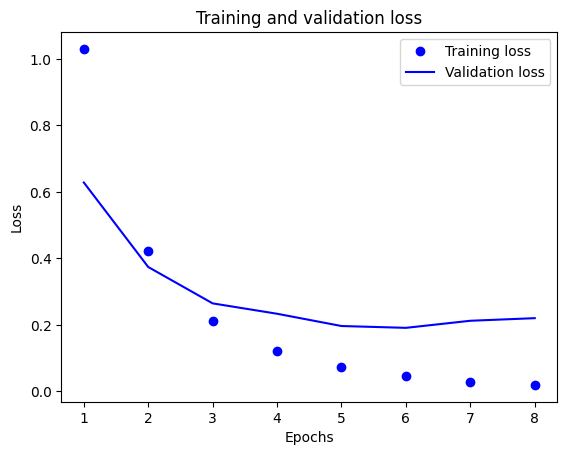

In [ ]:
history = model.fit(x_train_vectorized, y_train, epochs=8, batch_size=8, validation_split=0.25)
acc = history.history['accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

i)

In [ ]:
results = model.evaluate(x_test_vectorized, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2470 - accuracy: 0.9146
